# 4 Rooms data

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../../')))

## Loading

### From pickle

In [2]:
from src import Dataset
d = Dataset(data_dir='../../data/pickle')

In [2]:
# import pickle
# import pandas as pd

# registry = pd.read_csv('../../data/pickle/registry.csv')
# data = pickle.load(open('../../data/pickle/data.pickle', 'rb'))

### From csv files

In [2]:
import json
from src.data_loader import DataLoader

c = json.load(open('../../data/config.json'))
print(c)
dl = DataLoader(c)
dl.load()

{'root_data_dir': '/home/leo/simulations/4rooms/data/processed',
 'rats_toload': None,
 'sessions_toload': None,
 'datatype_toload': ['behaviour', 'neural'],
 'n_jobs': 64}

## Utils


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_positions(x,y, ax, **kwargs):
    ax.scatter(x,y, **kwargs)
    ax.grid(linestyle=':', alpha=0.9, axis='both')
    return ax

def plot_spike_times(neural_data, ax, **kwargs):
    c = 0
    for k,v in sorted(neural_data.items, key=lambda x: x[0]):
        x = v.spike_times
        ax.vlines(x, c, c+1, color='k', alpha=.3)
        ax.text(-150, c+0.5, k)
        c += 1
        
    #remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_yticks([])
    return ax

def get_spike_positions(positions, spike_times):
    p = pd.DataFrame(positions, columns=['x', 'y', 't'])
    p['t'] = pd.to_datetime(p.t, unit='s')
    p.set_index('t', inplace=True)
    p['is_behaviour'] = 1
    
    s = pd.DataFrame(spike_times, columns=['t'])
    s['t'] = pd.to_datetime(s['t'], unit='s')
    s.set_index('t', inplace=True)
    s['is_neural'] = 1

    spike_pos = p.join(s, how='outer')
    spike_pos[['x','y']] = spike_pos[['x','y']].interpolate(method='linear')

    return spike_pos



## Plots

In [4]:
sess = d.r35.S8a

### Spike positions

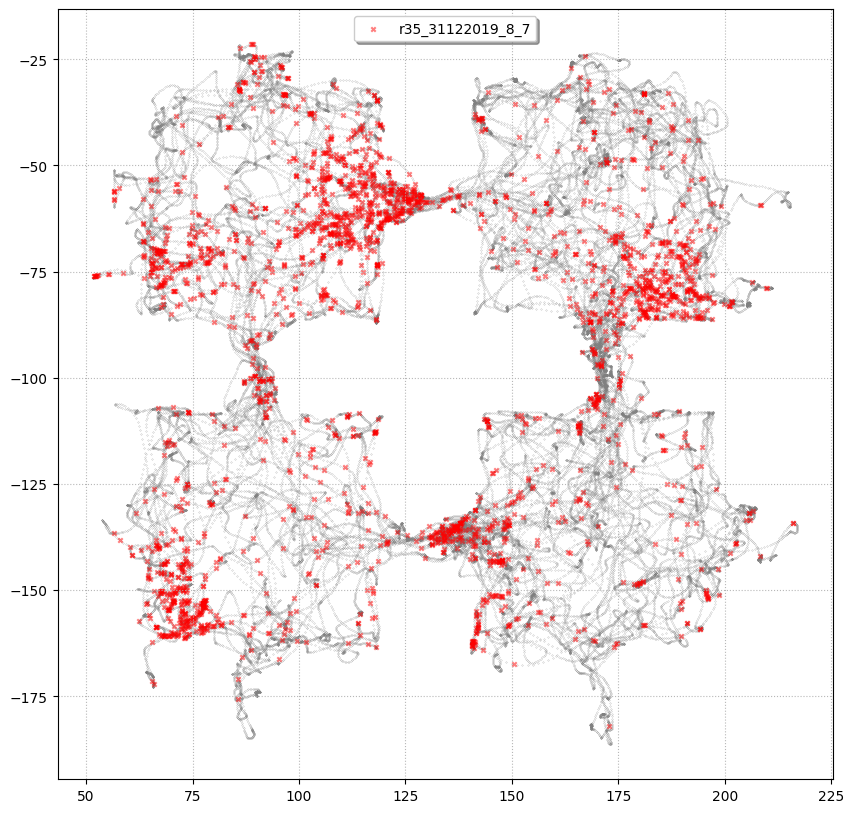

In [41]:
scatter_params = {
    's': .1,
    'alpha': 1,
    'c': 'grey',
    'marker': '.'
}

cell =  'r35_31122019_8_7'

fig, ax = plt.subplots(1,1, figsize=(10,10))

pos = sess.behaviour.positions
ax = plot_positions(pos[:,0], pos[:,1], ax, **scatter_params)

spike_pos = get_spike_positions(
    pos, 
    sess.neural.get(cell).spike_times
)

a = spike_pos[~spike_pos.is_neural.isna()]
ax.scatter(a.x, a.y, alpha=.5, s=10, marker='x', c='r', label=cell)

# legend outside plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True)
plt.show()

### Spike times

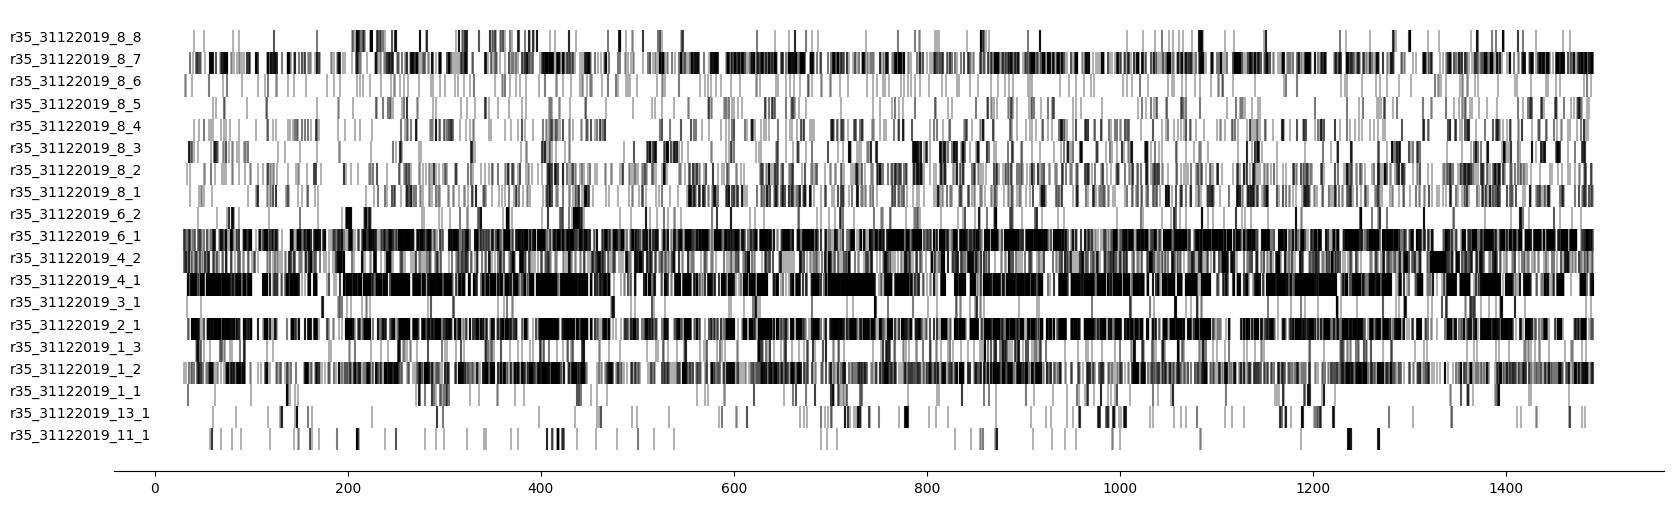

In [193]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
ax = plot_spike_times(sess.neural, ax)

### Spike positions (all neurons)

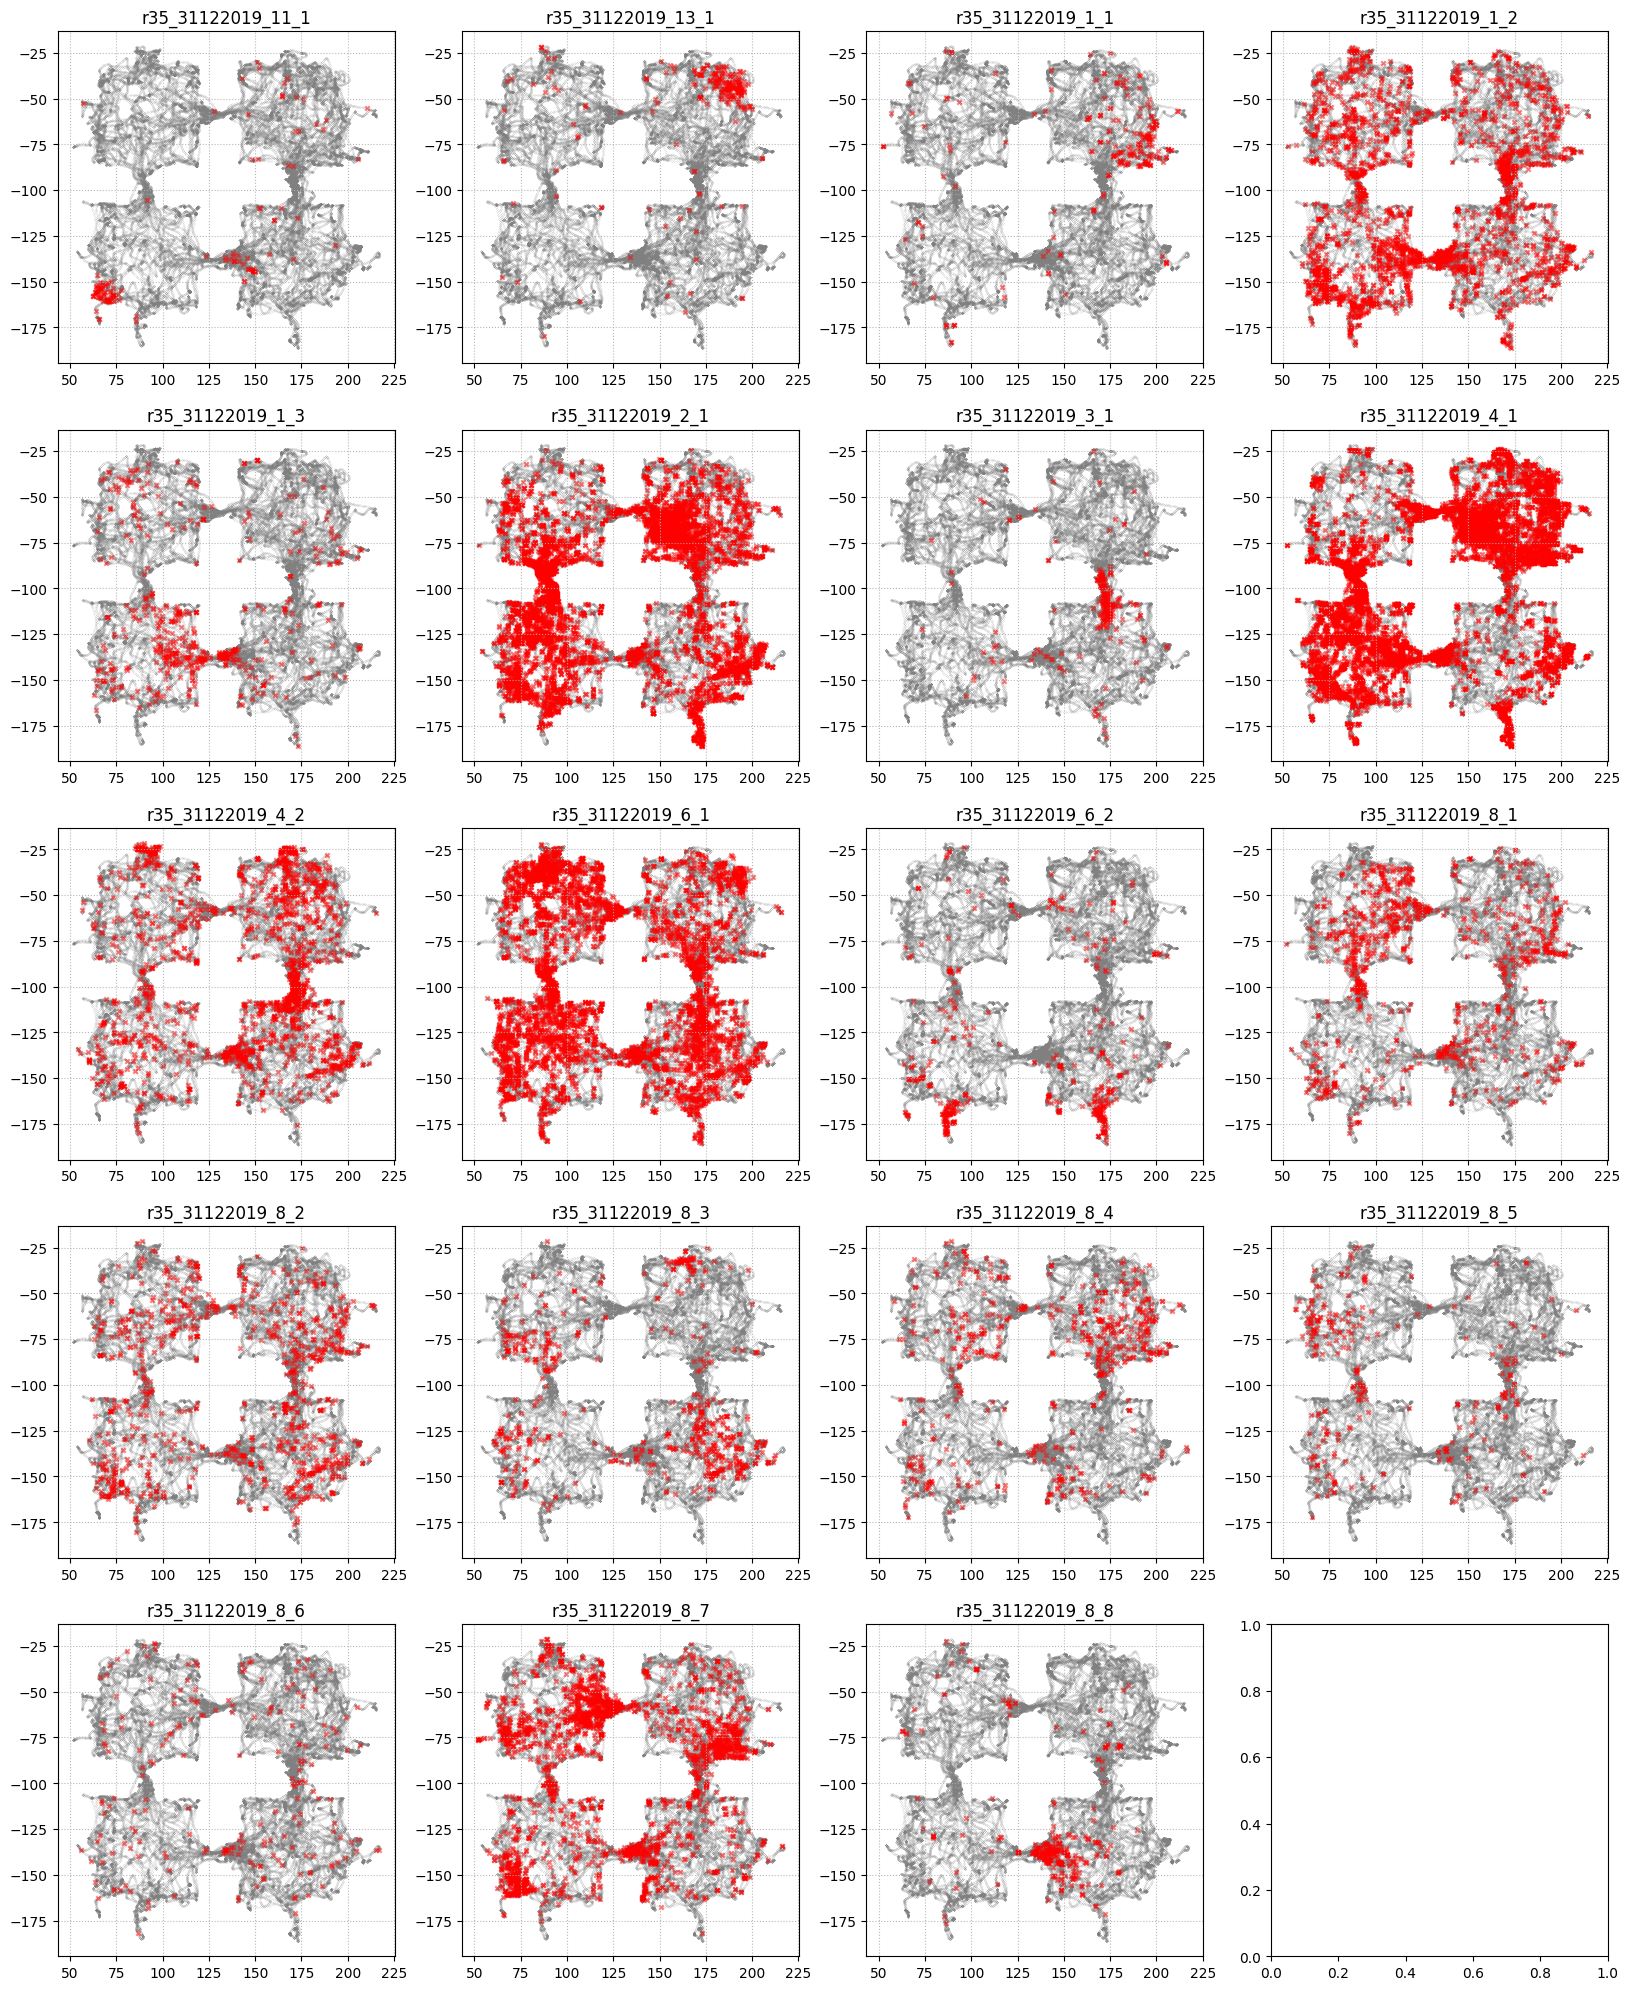

In [32]:
import matplotlib 
import numpy as np

scatter_params = {
    's': 0.01,
    'alpha': 1,
    'c': 'grey'
}

pos = sess.behaviour.positions

ncol = 4
nrow = int(np.ceil(len(sess.neural.keys) / ncol))

fig, axs = plt.subplots(nrow,ncol, figsize=(5*ncol, 5*nrow))
axs = axs.flatten()

for i, cell in enumerate(sorted(sess.neural.keys)):
    ax = axs[i]
    ax = plot_positions(pos[:,0], pos[:,1], ax, **scatter_params)

    spike_pos = get_spike_positions(
        pos, 
        sess.neural.get(cell).spike_times
    )

    a = spike_pos[~spike_pos.is_neural.isna()]
    ax.scatter(a.x, a.y, alpha=.5, s=10, marker='x', label=cell, color='r')
    ax.set_title(cell)
    #ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.05))


plt.show()

